<style>
    h1 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 24px; /* Increase font size for headings */
        font-weight: bold; /* Make headings bold */
    }

    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h1>Home Work-1 Computing Q2</h1>

<p>First, we will perform the required imports.</p>


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


<style>
    h2 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 20px; /* Set a standard font size */
        font-weight: bold; /* Make headings bold */
    }
    
    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    
    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h2>Question 2 Part A</h2>
<h3>Function Definitions</h3>


<p>Present Image.</p>




In [ ]:
def present_image(img, title, xlabel = '', ylabel = ''):
  # convert each of the RGB chnnels to the correct dynamic range:
  img = (((img-np.min(img))/np.max(img))* 255).astype(int);
  # Plot:
  plt.figure(figsize=(16,8));
  plt.imshow(img, cmap="gray");
  plt.title(title);
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show();
  
def compare_images(img1,img2, **args):
  # convert each of the RGB chnnels to the correct dynamic range:
  img1 = (((img1-np.min(img1))/np.max(img1))* 255).astype(int);
  img2 = (((img2-np.min(img2))/np.max(img2))* 255).astype(int);
  # Plot:
  plt.figure(figsize=(16,8))
  plt.subplot(121);
  plt.imshow(img1, cmap="gray")
  plt.title(args['title1'])
  plt.xlabel(args['xlabel1'])
  plt.ylabel(args['ylabel1'])
  plt.subplot(122)
  plt.imshow(abs(img2), cmap="gray")
  plt.title(args['title2'])
  plt.xlabel(args['xlabel2'])
  plt.ylabel(args['ylabel2'])
  plt.savefig(args['saveSrc'])
  plt.show()


<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5;">
    <p><strong>Next</strong>, is a function that translates the amplitude of an image to a logarithmic scale. For any pixel with a magnitude of <span style="font-style: italic;">x</span>, we will convert using <span style="font-family: 'Times New Roman', Times, serif;">log<sub>10</sub>(x+1)</span>. Since we expect the Fourier transform to output complex values, we will use <code>abs()</code> to calculate the magnitude.</p>
</div>


In [ ]:
def logarithmic_display_of_image(img):
  return np.log10(np.abs(img)+1)

<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5;">
    <p>Displaying image and the <strong>Uma.jpg</strong> FFT shifted log magnitude of amplitude.</p>
</div>


In [ ]:
# Load image in a gray scale format
I1 = cv2.imread('./imgs/Uma.jpg', cv2.IMREAD_GRAYSCALE)

# Perfrom the Furier tranform and shift the result
I1_f = np.fft.fft2(I1);
fshift = np.fft.fftshift(I1_f);
# Convert to log scale and present the output
log_image = logarithmic_display_of_image(fshift);

compare_images(I1,log_image, title1='Orginal', 
                title2='Uma.jpg shifted log magnitude of amplitude',
                xlabel1='size', ylabel1='size',
                xlabel2='u',
                ylabel2='v',
                saveSrc='./frequency_in_images/outPut.jpg');

<!DOCTYPE html>
<html>
<head>
    <title>Styled Image</title>
    <style>
        /* Define the styles for the image */
        .styled-image {
            width: 700px; /* Set the width */
            height: auto; /* Maintain aspect ratio */
            border: 2px solid #ccc; /* Add a border */
            border-radius: 10px; /* Add rounded corners */
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); /* Add a shadow */
        }
    </style>
</head>
<body>
    <!-- Place your image here with the 'styled-image' class -->
    <img src="../frequency_in_images/outPut.jpg" alt="Styled Image" class="styled-image">
</body>
</html>


<style>
    h2 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 20px; /* Set a standard font size */
        font-weight: bold; /* Make headings bold */
    }
    
    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    
    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h2>Question 2 Part B</h2>





<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5;">
    <p>Select the 5% lowest frequencies of the image in the <em>x</em>-direction (with all their frequencies in the <em>y</em>-direction) and the 5% lowest frequencies of the image in the <em>y</em>-direction (with all their frequencies in the <em>x</em>-direction). The different frequencies other than zero should be in the form of a "band" in both axes, as shown in the illustration (after fftshift).</p>
</div>


<div style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5;">
    <p>Partition the x-axis and y-axis of the Fourier transform
       Shift back and do the IFFT
       Plot the frequency of the Partition and with output_image_fft_shift</p>
</div>


In [ ]:

height, width = I1.shape
x_partition = int(round(0.05 * width))
y_partition = int(round(0.05 * height))

# Partition the x-axis and y-axis of the Fourier transform
x_axis_sorted = np.sort(I1_f, axis=1)
y_axis_sorted = np.sort(I1_f, axis=0)



# Create an output image initialized with zeros
output_image_fft = np.zeros(I1_f.shape)

# Take the partitions
output_image_fft[:, :x_partition] = x_axis_sorted[:, :x_partition]
output_image_fft[:, -x_partition:] = x_axis_sorted[:, -x_partition:]
output_image_fft[:y_partition, :]  = y_axis_sorted[:y_partition, :]
output_image_fft[-y_partition:, :] =  y_axis_sorted[-y_partition:, :]

output_image_fft_shift = np.fft.fftshift(output_image_fft)
# plt.imshow(logarithmic_display_of_image(output_image_fft_shift ),cmap="gray")
# plt.show()


output_image_SHIFTED_back = np.fft.fftshift(output_image_fft_shift)
output_image_restores= np.fft.ifft2(output_image_SHIFTED_back)


# Plot the original image and the transformed image
disply = logarithmic_display_of_image(output_image_fft_shift )
compare_images(disply, np.abs(output_image_restores), 
                title1='5% lowest frequencies of the image in the x and y axis', 
                title2='Inverse Fourier Transformed Image',
                xlabel1='Width', ylabel1='Height',
                xlabel2='Frequency (u)', ylabel2='Frequency (v)',
                saveSrc='./outPut2.jpg')


<!DOCTYPE html>
<html>
<head>
    <title>Styled Image</title>
    <style>
        /* Define the styles for the image */
        .styled-image {
            width: 700px; /* Set the width */
            height: auto; /* Maintain aspect ratio */
            border: 2px solid #ccc; /* Add a border */
            border-radius: 10px; /* Add rounded corners */
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); /* Add a shadow */
        }
    </style>
</head>
<body>
    <!-- Place your image here with the 'styled-image' class -->
    <img src="../frequency_in_images/outPut2.jpg" alt="Styled Image" class="styled-image">
</body>
</html>


<style>
    h2 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 20px; /* Set a standard font size */
        font-weight: bold; /* Make headings bold */
    }
    
    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    
    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h2>Question 2 Part C D E</h2>
<p>Summarize the values ​​in the columns and in the rows of the conversion amplification. Using the sort function, find the positions of the top 5% dominant columns - those in which the sum of the values ​​is highest.</p>





In [ ]:

height, width = I1.shape
x_partition = 95
y_partition = 95

# Calculate sum of x-axis and y-axis of the Fourier transform
sum_x_axis = np.sum(np.abs(I1_f), axis=0)
sum_y_axis = np.sum(np.abs(I1_f), axis=1)

# Find the partition values
x_val_partition = np.percentile(sum_x_axis, x_partition)
y_val_partition = np.percentile(sum_y_axis, y_partition)


# Find the indices where sum_x_axis and sum_y_axis are less than or equal to partition values
x_indices =  np.where( sum_x_axis >= x_val_partition)[0]
y_indices =  np.where( sum_y_axis >= y_val_partition)[0]

# Create a zero array
zero_one_arr = np.zeros(I1.shape)

# Set 1 to the columns and rows corresponding to x_indices and y_indices respectively
zero_one_arr[:, x_indices] = 1
zero_one_arr[y_indices,:] = 1

present_image(zero_one_arr, "zero one")


<style>
    h2 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for headings */
        font-size: 20px; /* Set a standard font size */
        font-weight: bold; /* Make headings bold */
    }
    
    h3 {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for subheadings */
        font-size: 20px; /* Increase font size for subheadings */
        font-weight: bold; /* Make subheadings bold */
    }

    
    p {
        font-family: "Times New Roman", Times, serif; /* Use a serif font for paragraph text */
        font-size: 16px; /* Set a standard font size */
        line-height: 1.6; /* Increase line height for better readability */
    }
</style>

<h2>Question 2 Part F</h2>







In [ ]:
# Perform the Fourier transform
f = np.fft.fft2(I1)
fshift = np.fft.fftshift(f)

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(fshift)

# Find the 10% threshold
threshold = np.percentile(magnitude_spectrum.flatten(), 90)

# Create an array to store the selected frequencies
selected_frequencies = np.zeros_like(magnitude_spectrum)

# Select frequencies above the threshold
selected_frequencies[magnitude_spectrum >= threshold] = 1

present_image(selected_frequencies,"")
# Apply the mask to the Fourier transform
fshift_filtered = fshift * selected_frequencies

# Perform the inverse Fourier transform
f_filtered = np.fft.ifftshift(fshift_filtered)
image_filtered = np.fft.ifft2(f_filtered)
image_filtered = np.abs(image_filtered)


# Display the original and filtered images side by side
plt.subplot(1, 2, 1)
plt.imshow(I1, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(image_filtered, cmap='gray')
plt.title("Filtered Image")

plt.show()

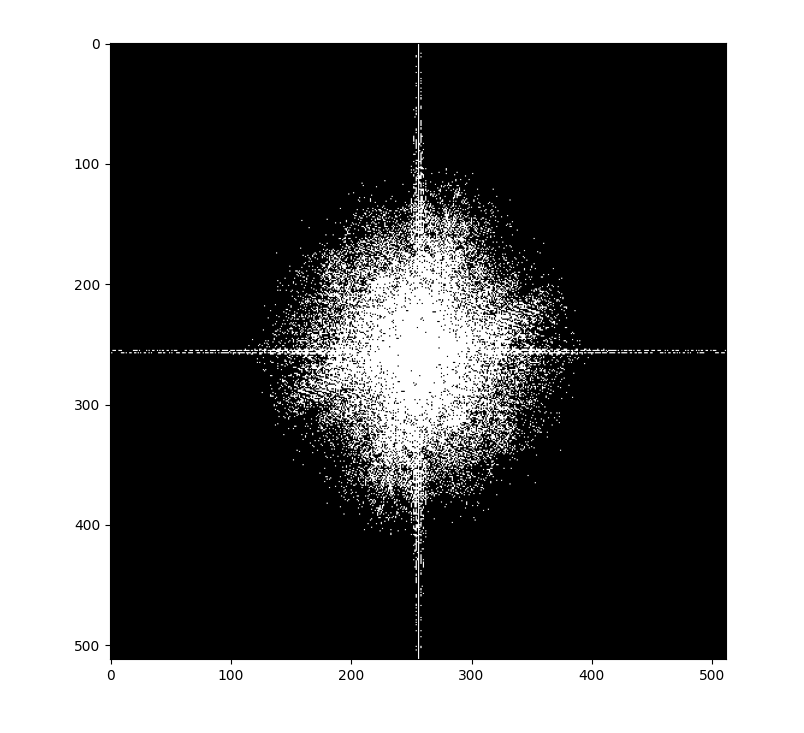

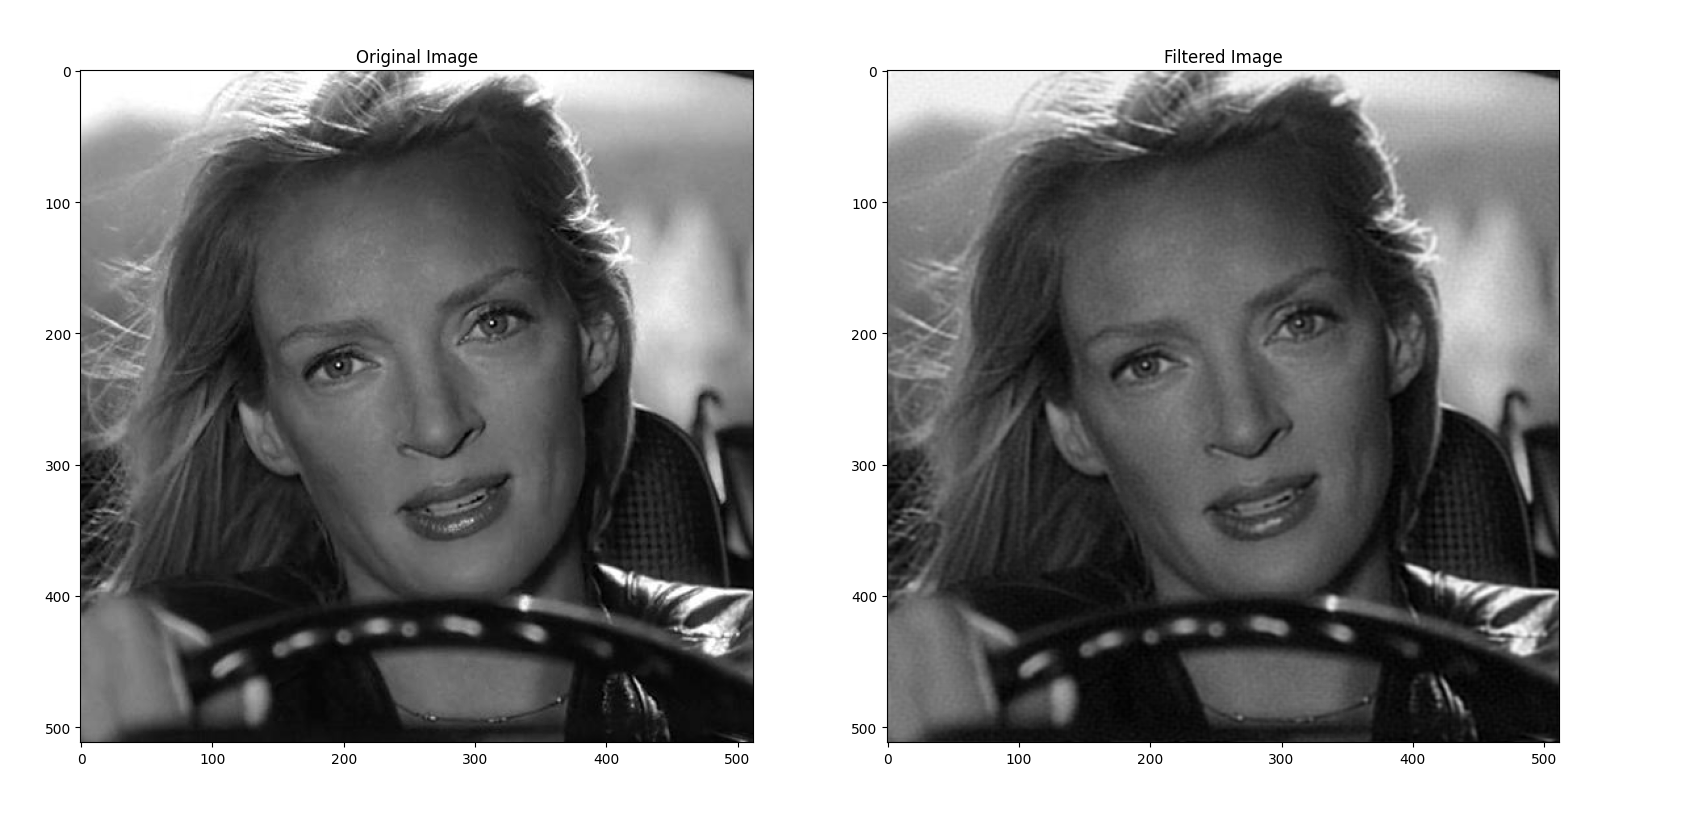